In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Explaining some parameters:

`ani = FuncAnimation(fig, update, frames=np.arange(0, total_time, 10*dt), blit=blit_value, interval=frame_interval)`
- fig -> figure variable
- update -> function that updates the previous step from `t` to `t+dt`
- frames -> integer frames used for plotting, 
    - typically: `[0 12 24 36 48 ... ]`
    - but allowed would be: `[0 11 32 24 -4 33 ... ]`
- blit: (useful for complex equations)
    - `True` -> only the parts that have changed are redrawn
    - `False` -> not
- interval -> milliseconds taken to switch from previous frame to the next frame 

C:\Users\tester\AppData\Local\Temp\ipykernel_12304\4108265779.py:52: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lines[i].set_data(xs[i], ys[i])


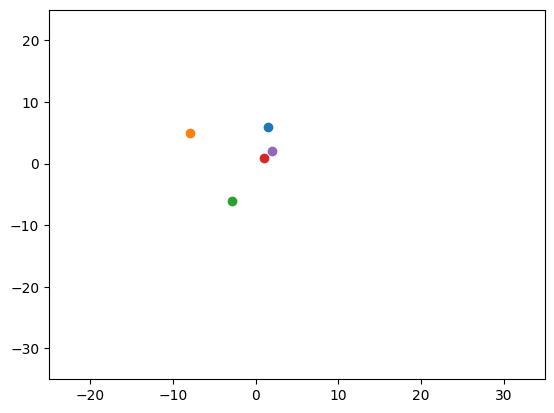

C:\Users\tester\AppData\Local\Temp\ipykernel_12304\4108265779.py:52: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lines[i].set_data(xs[i], ys[i])


In [2]:
# Plot Parameter
frame_interval = 15
# frames_skipped = 20 #this is hard
total_time = 2
blit_value = True

# Constants
k = 60
dt = 0.01
unphysical_softening_distance=1

# Number of particles
num_particles = 5

# Initial conditions (for 3 particles)
xs = [1.5, -8, -3, 1, 2]
ys = [6, 5, -6, 1, 2]
vxs = [-0.3, 1, 4, -0.5, -0.3]
vys = [0.5, -2, 0, -1, -0.3]

lines = []

def compute_force(i):
    fx_total, fy_total = 0, 0
    
    for j in range(num_particles):
        if i != j:
            dx = xs[i] - xs[j]
            dy = ys[i] - ys[j]
            r = np.sqrt(dx**2 + dy**2+unphysical_softening_distance)
            f = k / r**3   # r^3 since we'll multiply with dx or dy to get fx and fy
            fx_total -= f * dx
            fy_total -= f * dy
    return fx_total, fy_total

# Plot screen: Increase limits to plot a larger region.
fig, ax = plt.subplots()
ax.set_xlim(-25, 35)
ax.set_ylim(-35, 25)

def update(frame):
    for i in range(num_particles):
        fx, fy = compute_force(i)
        
        # Update velocity
        vxs[i] += fx * dt
        vys[i] += fy * dt
        
        # Update position
        xs[i] += vxs[i] * dt
        ys[i] += vys[i] * dt
        lines[i].set_data(xs[i], ys[i])
    return lines

# Initialize lines for the animation
for _ in range(num_particles):
    line, = ax.plot([], [], 'o', lw=2)
    lines.append(line)

# Begins Animation:
ani = FuncAnimation(fig, update, frames=np.arange(0, total_time, dt), blit=blit_value, interval=frame_interval)

plt.show()

HTML(ani.to_html5_video())